<a href="https://colab.research.google.com/github/TshepisoMas/Python_programming/blob/main/Logistic_Regression(dummyVariables).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook i an learning how to plot and interprete Logistic regression using python.

In [ ]:
#@title Importing necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#@title Load data
raw_data=pd.read_csv('/content/2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


The data consist of 168 observations and 2 columns. Noticing that one column is numerical and the other catergorical. This suggests that this analysis is not Linear regression is not appropriate for this analysis.

Its going to be easier to work with binaries instead, therefore let convert our catergorical column to binary.

In [ ]:
data = raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


<function matplotlib.pyplot.show(close=None, block=None)>

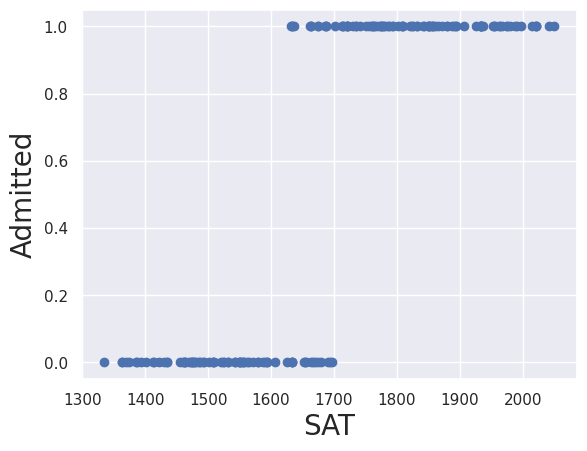

In [ ]:
#@title we can verify that linear regression is appropriate for trhis analysis. Lets try to use Scatter plot .
y = data['Admitted']
x1 = data['SAT']

plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show

Noticing the upnormality of the scatter plot, this is as a result to the type of data we are using for this analysis. This is a catergorical data not Numerical data hence we cant use scatter plot for a catergorical data.

<ipython-input-11-2eea473f0b3a>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = x1*results_lin.params[1]+results_lin.params[0]


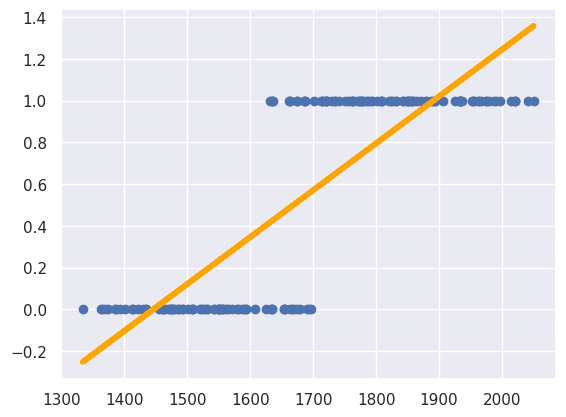

In [ ]:
#@title Plot with linear regression
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()
results_lin.summary()

plt.scatter(x1,y)
yhat = x1*results_lin.params[1]+results_lin.params[0]
fig = plt.plot(x1,yhat,lw=4,c='orange',label='regression line')

The  linearity assumption is already violated,therefore  this is not an appropriate diagonostics for this analysis. This regression predicts the values that are outside our domains.

In [ ]:
#@title Now we can jump to Logistid regression analysis

reg_log = sm.Logit(y,x1)
results_log = reg_log.fit()

def f(x,beta_0,beta_1):
  """

  Args:
    x:
    beta_0:
    beta_1:

  Returns:

  """
  return np.array(np.exp(beta_0+beta_1*x)/(1+np.exp(beta_0+beta_1*x)))


  f = np.sort(f(x1,results_log.params[0],results_log.params[1]))
  x = np.sort(np.array(x1))



Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<ipython-input-27-dcb32c41850f>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_probabilities = logistic_function(x_values, results_log.params[0], results_log.params[1])


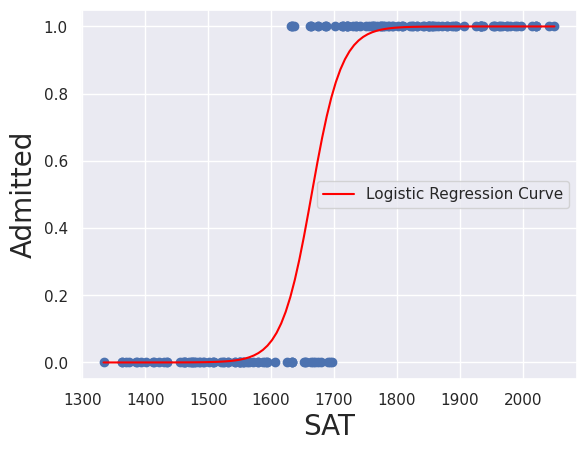

In [ ]:
#@title Logistic Regression Curve
# prompt: include a logistic regression curve on the above scatter plot

import numpy as np
import matplotlib.pyplot as plt

# Assuming we have x1, y, and results_log defined from your previous code

def logistic_function(x, beta_0, beta_1):
  """Calculates the logistic function for given x, beta_0, and beta_1.
  """
  return np.exp(beta_0 + beta_1 * x) / (1 + np.exp(beta_0 + beta_1 * x))


# Generate a range of x values for plotting the logistic regression curve
x_values = np.linspace(x1.min(), x1.max(), 100)

# Calculate the predicted probabilities using the logistic regression coefficients
y_probabilities = logistic_function(x_values, results_log.params[0], results_log.params[1])

# Plot the scatter plot and the logistic regression curve
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_values, y_probabilities, color='red', label='Logistic Regression Curve')
plt.legend()
plt.show()


This works right for the analysis. From the plot we learn that the probability of getting admitted with a SAT of about 1560 and less is 0%. However, the probability of being admitted with a SAT of 1750 and above is 100%, uncertain elsewhere.

In [ ]:
#@title Logit regression model
x = sm.add_constant(data['SAT'])
reg_logit = sm.Logit(data['Admitted'],x)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Sep 2024   Pseudo R-squ.:                  0.7992
Time:                        12:03:09   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
#@title Accuracy

#for the predicted values by the model

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_logit.predict()

array([0.00, 1.00, 1.00, 0.38, 0.05, 0.98, 0.99, 1.00, 1.00, 0.03, 1.00,
       1.00, 0.50, 0.00, 0.77, 1.00, 0.21, 0.22, 0.23, 1.00, 1.00, 1.00,
       0.00, 0.00, 0.91, 1.00, 0.22, 1.00, 1.00, 0.98, 0.00, 0.61, 0.41,
       1.00, 1.00, 1.00, 0.50, 1.00, 0.39, 0.00, 0.04, 0.20, 1.00, 0.00,
       1.00, 0.00, 0.98, 0.00, 0.00, 0.01, 0.01, 1.00, 0.80, 0.01, 1.00,
       0.00, 0.56, 0.95, 0.22, 0.99, 0.01, 0.89, 1.00, 1.00, 0.99, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.89, 0.22, 0.00, 1.00, 1.00, 1.00, 0.00,
       0.49, 1.00, 1.00, 0.01, 1.00, 1.00, 0.65, 1.00, 1.00, 0.00, 1.00,
       0.99, 0.72, 0.60, 0.00, 0.95, 0.91, 0.00, 1.00, 1.00, 0.01, 0.98,
       0.88, 0.99, 0.00, 0.99, 0.03, 0.00, 0.99, 0.99, 1.00, 0.00, 0.00,
       0.04, 0.52, 0.00, 1.00, 0.16, 0.00, 0.92, 0.00, 0.47, 1.00, 1.00,
       0.02, 0.00, 0.00, 1.00, 0.01, 0.96, 0.75, 0.72, 0.94, 0.60, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.08, 0.00, 0.01, 1.00, 0.98, 0.70,
       0.99, 1.00, 0.02, 0.00, 0.00, 0.00, 0.83, 1.

In [35]:
#Actual  values
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [36]:
results_logit.pred_table()


array([[67.00, 7.00],
       [7.00, 87.00]])

In [38]:
#@title CONFUSION MATRIX
cm_df = pd.DataFrame(results_logit.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


For 67 observation the model predicted 0 and the true value was 0,
For 87 observation the model predicted 1 and the true value was 1. In 154 cases the model did a good Job.

For 7 observation the model predicted 0 while the true value was 1,
For 7 observation the model predicted 1 while the true value was 0,

Overall the model made an accuracy prediction in 154 out of 198 cases, which is 154/168=0.9166666667= 91.7%

In [39]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666